# Where's There's Data There's Hope

### Loading

In [1]:
import pandas as pd

In [2]:
dataframe = pd.read_csv('netflix_titles.csv')

In [3]:
# remove the Duplicates and Delete the row with all missing values
dataframe.drop_duplicates(inplace=True)

In [4]:
missing_values = dataframe.isnull().sum()
print(missing_values)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [5]:
dataframe.dropna(inplace=True)

In [6]:
missing_values = dataframe.isnull().sum()
print(missing_values)

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering
features = dataframe[['release_year', 'duration']]

# Convert 'duration' to numeric by removing 'min' and 'Seasons' and converting to integers
features['duration'] = features['duration'].apply(lambda x: int(x.split()[0]))

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
dataframe['cluster'] = kmeans.fit_predict(scaled_features)

# Print the first few rows of the dataframe with the cluster labels
print(dataframe.head())

C:\Users\saqib\AppData\Local\Temp\ipykernel_30396\2051592671.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['duration'] = features['duration'].apply(lambda x: int(x.split()[0]))


   show_id     type                          title             director  \
7       s8    Movie                        Sankofa         Haile Gerima   
8       s9  TV Show  The Great British Baking Show      Andy Devonshire   
9      s10    Movie                   The Starling       Theodore Melfi   
12     s13    Movie                   Je Suis Karl  Christian Schwochow   
24     s25    Movie                          Jeans           S. Shankar   

                                                 cast  \
7   Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
8   Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...   
9   Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...   
12  Luna Wedler, Jannis Niewöhner, Milan Peschel, ...   
24  Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...   

                                              country          date_added  \
7   United States, Ghana, Burkina Faso, United Kin...  September 24, 2021   
8                                      United Kingdo

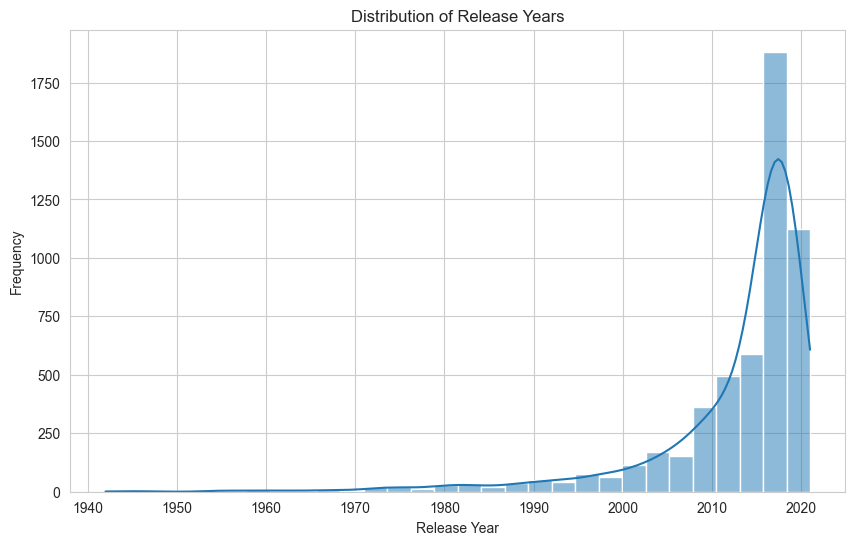

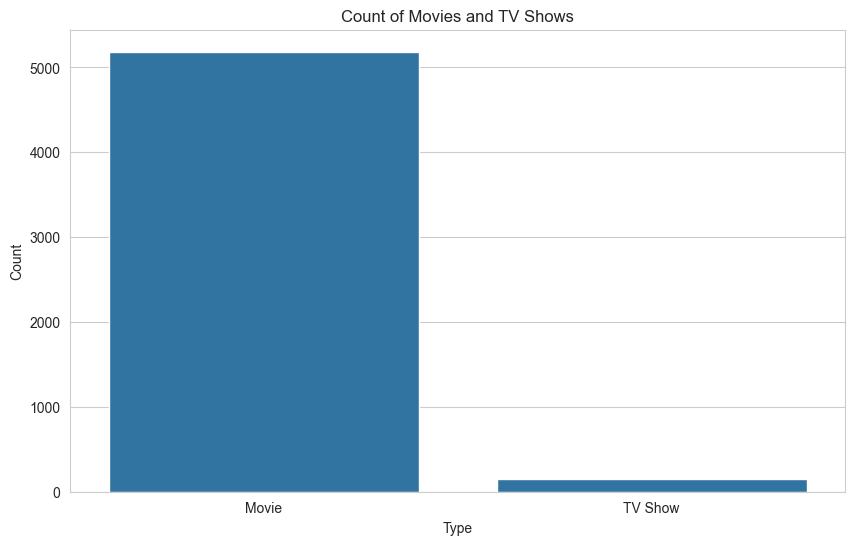

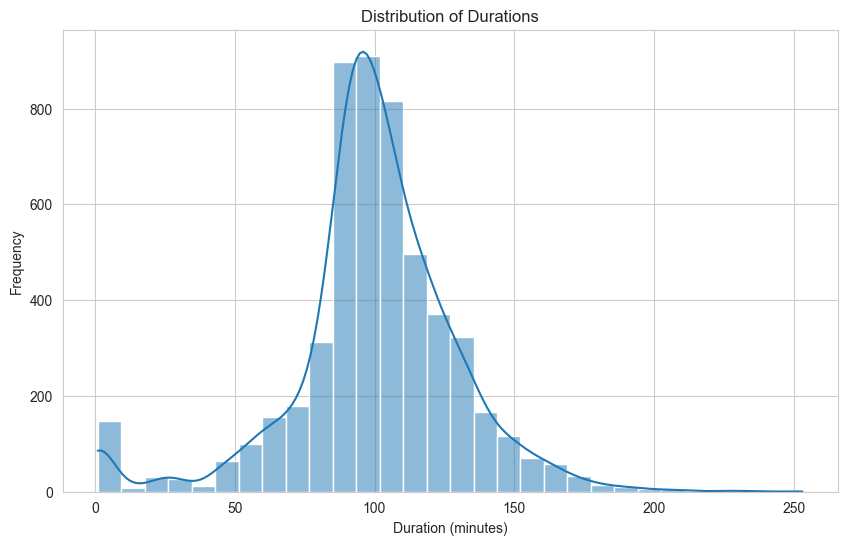

In [8]:
import seaborn as sns

import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot the distribution of release years
plt.figure(figsize=(10, 6))
sns.histplot(dataframe['release_year'], bins=30, kde=True)
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

# Plot the count of movies and TV shows
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=dataframe)
plt.title('Count of Movies and TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

# Plot the distribution of durations
plt.figure(figsize=(10, 6))
sns.histplot(dataframe['duration'].apply(lambda x: int(x.split()[0])), bins=30, kde=True)
plt.title('Distribution of Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()